<a href="https://colab.research.google.com/github/Nabarundutta/Machine-Learning/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples = 100,n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [5]:
X.shape

(100, 5)

In [6]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df.head()

,col1,col2,col3,col4,col5
0,1.292387,-0.471125,3.876062,-0.480668,0.527034
1,0.782698,0.566391,-0.623335,-1.065757,-0.596888
2,1.569213,0.671819,2.799770,-1.657935,0.035071
3,1.143813,2.827013,1.413439,-1.545595,-1.687842
4,-0.215735,2.255844,-0.947153,-2.849626,0.365719


In [7]:
df['target'] = y

In [8]:
df.head()

,col1,col2,col3,col4,col5,target
0,1.292387,-0.471125,3.876062,-0.480668,0.527034,0
1,0.782698,0.566391,-0.623335,-1.065757,-0.596888,1
2,1.569213,0.671819,2.799770,-1.657935,0.035071,0
3,1.143813,2.827013,1.413439,-1.545595,-1.687842,0
4,-0.215735,2.255844,-0.947153,-2.849626,0.365719,1


In [11]:
df.shape

(100, 6)

In [12]:
def sample_rows(df,percentage):
    return df.sample(int(percentage*df.shape[0]),replace = True)

In [14]:
def sample_columns(df,percentage):
    cols = random.sample(df.columns.tolist()[:-1],int(percentage*df.shape[1]-1))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [34]:
int(0.5*df.shape[1])

3

In [32]:
df.columns.tolist()[:-1]

['col1', 'col2', 'col3', 'col4', 'col5']

In [18]:
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [19]:
df1 = sample_rows(df,0.5)
df2 = sample_rows(df,0.3)
df3 = sample_rows(df,0.4)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [21]:
dtc1 = DecisionTreeClassifier()
dtc2 = DecisionTreeClassifier()
dtc3 = DecisionTreeClassifier()

In [23]:
df1.head()

,col1,col2,col3,col4,col5,target
4,-0.215735,2.255844,-0.947153,-2.849626,0.365719,1
41,0.826311,-0.316453,-0.163224,-0.986881,-0.589197,0
5,3.664215,-0.314689,-1.195002,-0.531284,-1.919619,1
56,1.734878,2.936921,-1.250883,-1.734953,-0.469865,1
16,-0.478456,1.340846,-0.392243,-1.027821,-1.358655,0


In [24]:
dtc1.fit(df1.iloc[:,:5],df1.iloc[:,-1])
dtc2.fit(df2.iloc[:,:5],df2.iloc[:,-1])
dtc3.fit(df3.iloc[:,:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [25]:
dtc1.predict([[-0.215735	,2.255844,	-0.947153	,-2.849626,	0.365719,	]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [26]:
dtc2.predict([[-0.215735	,2.255844,	-0.947153	,-2.849626,	0.365719,	]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [27]:
dtc3.predict([[-0.215735	,2.255844,	-0.947153	,-2.849626,	0.365719,	]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

[Text(0.4583333333333333, 0.9, 'x[2] <= -0.72\ngini = 0.493\nsamples = 50\nvalue = [28, 22]'),
 Text(0.25, 0.7, 'x[4] <= -1.603\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= -0.108\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.6666666666666666, 0.7, 'x[0] <= 2.132\ngini = 0.271\nsamples = 31\nvalue = [26, 5]'),
 Text(0.5, 0.5, 'x[0] <= 1.889\ngini = 0.074\nsamples = 26\nvalue = [25, 1]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.5833333333333334, 0.3, 'x[1] <= -0.678\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8333333333333334, 0.5, 'x[1] <

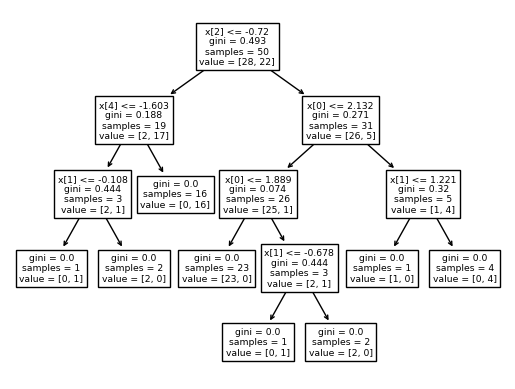

In [28]:
from sklearn.tree import plot_tree
plot_tree(dtc1)

[Text(0.5555555555555556, 0.875, 'x[2] <= 0.053\ngini = 0.498\nsamples = 30\nvalue = [14, 16]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= -0.695\ngini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(0.2222222222222222, 0.375, 'x[4] <= -0.974\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.7777777777777778, 0.625, 'x[3] <= -2.111\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 1.227\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]')]

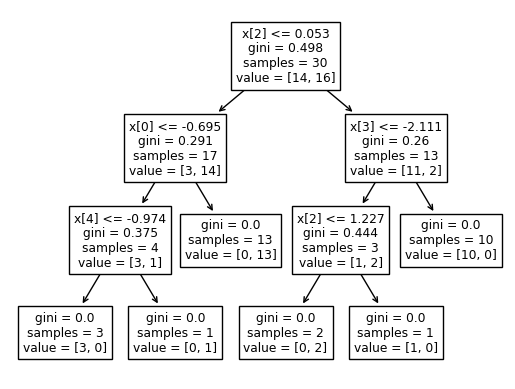

In [29]:
plot_tree(dtc2)

[Text(0.625, 0.875, 'x[2] <= 0.552\ngini = 0.5\nsamples = 40\nvalue = [20, 20]'),
 Text(0.5, 0.625, 'x[4] <= -1.288\ngini = 0.384\nsamples = 27\nvalue = [7, 20]'),
 Text(0.25, 0.375, 'x[0] <= 1.452\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.375, 'x[1] <= 0.261\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]')]

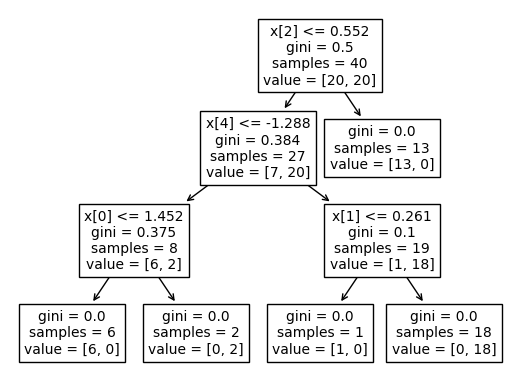

In [31]:
plot_tree(dtc3)